Ensemble (LogisticRegression + RandomForest + XGBoost + catBoost)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



import matplotlib.font_manager as fm
import matplotlib

# 윈도우
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname = font_path).get_name()
# matplotlib.rc('font', family=font)

# 맥
font_path = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [17]:
df = pd.read_csv('./data/train.csv').drop(columns=['UID'])

In [18]:
df.info()   # non-null: 이상치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  object 
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  object 
 11  대출 상환 기간           10000 non-null  object 
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
 16  채무 불이행 여부          1000

In [19]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

                주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0                  자가  1941337.5      10년 이상          0.0           9   
1                  월세  1979505.0      10년 이상          0.0           5   
2                  월세  1356381.0          4년          0.0          12   
3                  월세  1049017.5          6년          0.0          15   
4                  월세  4320217.5          2년          0.0          11   
...               ...        ...         ...          ...         ...   
9995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0           9   
9996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0          11   
9997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0           9   
9998               자가  3343584.0      10년 이상          0.0          10   
9999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수   대출 목적  \
0         13.4  400597.5            0        

In [20]:
# 원 핫 인코딩
categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']


X = pd.get_dummies(X, columns = categories, dtype=int) 

X

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1941337.5,0.0,9,13.4,400597.5,0,24,1,390903.0,225457.5,...,0,0,0,0,0,0,0,0,1,0
1,1979505.0,0.0,5,15.1,360679.5,0,11,0,1002184.5,64749.0,...,0,0,0,0,0,0,0,0,1,0
2,1356381.0,0.0,12,18.8,491770.5,1,74,3,227775.0,487644.0,...,0,0,0,0,0,0,0,0,1,0
3,1049017.5,0.0,15,14.8,411546.0,1,22,1,251383.5,413211.0,...,0,0,0,0,0,0,0,0,1,0
4,4320217.5,0.0,11,26.1,895288.5,0,32,0,1163176.5,78991.5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,0.0,9,18.7,319027.5,0,68,0,126216.0,177028.5,...,0,0,0,0,0,0,0,0,1,0
9996,2297230.5,0.0,11,28.3,399799.5,0,7,0,371907.0,347449.5,...,0,0,0,0,0,1,0,0,0,1
9997,1221523.5,0.0,9,30.1,823305.0,0,14,0,869736.0,176905.5,...,0,0,0,0,0,0,0,0,0,1
9998,3343584.0,0.0,10,20.3,724314.0,0,25,0,443008.5,139294.5,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# 로그
cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

for i in cl:
    X[i] = X[i].apply(lambda x: np.log1p(x))

X

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1941337.5,0.0,9,13.4,400597.5,0,24,1,12.876217,12.325891,...,0,0,0,0,0,0,0,0,1,0
1,1979505.0,0.0,5,15.1,360679.5,0,11,0,13.817694,11.078289,...,0,0,0,0,0,0,0,0,1,0
2,1356381.0,0.0,12,18.8,491770.5,1,74,3,12.336118,13.097343,...,0,0,0,0,0,0,0,0,1,0
3,1049017.5,0.0,15,14.8,411546.0,1,22,1,12.434739,12.931716,...,0,0,0,0,0,0,0,0,1,0
4,4320217.5,0.0,11,26.1,895288.5,0,32,0,13.966666,11.277108,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,0.0,9,18.7,319027.5,0,68,0,11.745758,12.084072,...,0,0,0,0,0,0,0,0,1,0
9996,2297230.5,0.0,11,28.3,399799.5,0,7,0,12.826402,12.758377,...,0,0,0,0,0,1,0,0,0,1
9997,1221523.5,0.0,9,30.1,823305.0,0,14,0,13.675946,12.083377,...,0,0,0,0,0,0,0,0,0,1
9998,3343584.0,0.0,10,20.3,724314.0,0,25,0,13.001346,11.844353,...,0,0,0,0,0,0,0,0,1,0


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [24]:
# 개별 모델 정의
lr_clf = LogisticRegression(
    C= 0.11393453754325446,
    solver= 'lbfgs',
    max_iter= 522,
    random_state=42
    )
rf_clf = RandomForestClassifier(
    n_estimators= 492,
    max_depth= 16,
    min_samples_split= 2,
    min_samples_leaf= 2,
    max_features= 'log2',
    bootstrap =False,
    random_state=42
    
    )
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=5, 
    learning_rate=0.1,
    random_state=0,
    # early_stopping_rounds=10,   # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metrics='logloss'
    )
cat_clf = CatBoostClassifier(
    iterations= 610, 
    depth= 3,
    learning_rate= 0.08202873455802175,
    l2_leaf_reg= 8.38496952312003,
    border_count= 145, 
    random_strength= 1.548870459171905,
    verbose=0, random_state=42
    )
#(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Voting Classifier 정의 (Soft Voting 사용)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('rf', rf_clf), ('cat', cat_clf), ('lr', lr_clf)],
    voting='soft'  # 확률 기반 투표
)

In [25]:
# 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_train = voting_clf.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
print("학습 점수: ", acc_score_train)

y_pred_test = voting_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print("테스트 평가 점수: ", acc_score_test)

학습 점수:  0.9017333333333334
테스트 평가 점수:  0.7144


In [26]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

print(f'훈련 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'평가 정확도: {accuracy_score(y_test, y_pred_test)}')

print(classification_report(y_test, y_pred_test))

훈련 정확도: 0.9017333333333334
평가 정확도: 0.7144
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1618
           1       0.68      0.35      0.47       882

    accuracy                           0.71      2500
   macro avg       0.70      0.63      0.64      2500
weighted avg       0.71      0.71      0.69      2500



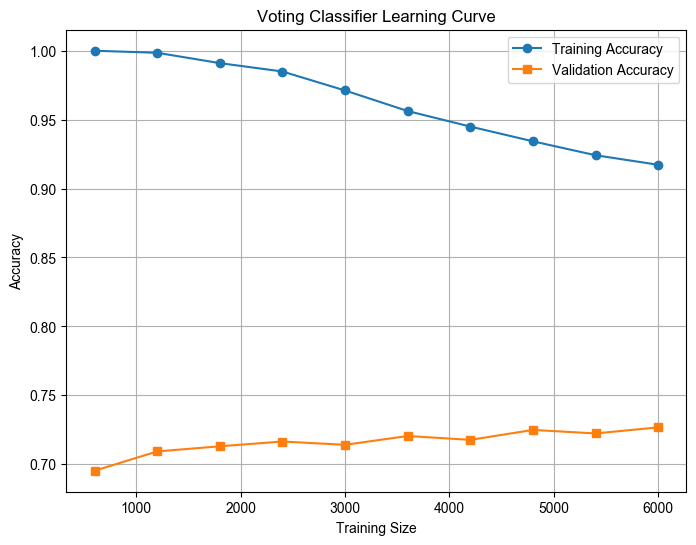

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 학습 곡선 그리기 함수
def plot_learning_curve(model, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# VotingClassifier 학습 곡선 시각화
plot_learning_curve(voting_clf, X_train, y_train, title="Voting Classifier Learning Curve")


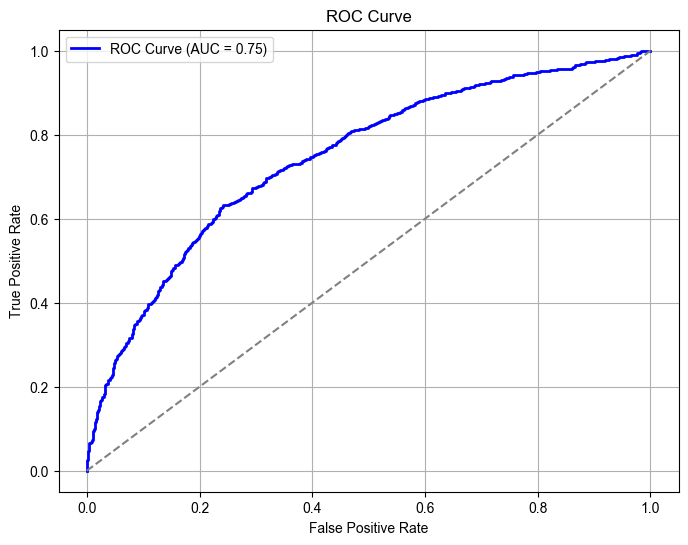

In [14]:
from sklearn.metrics import roc_curve, auc

# 예측 확률 가져오기 (soft voting이므로 가능)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# ROC Curve 계산
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


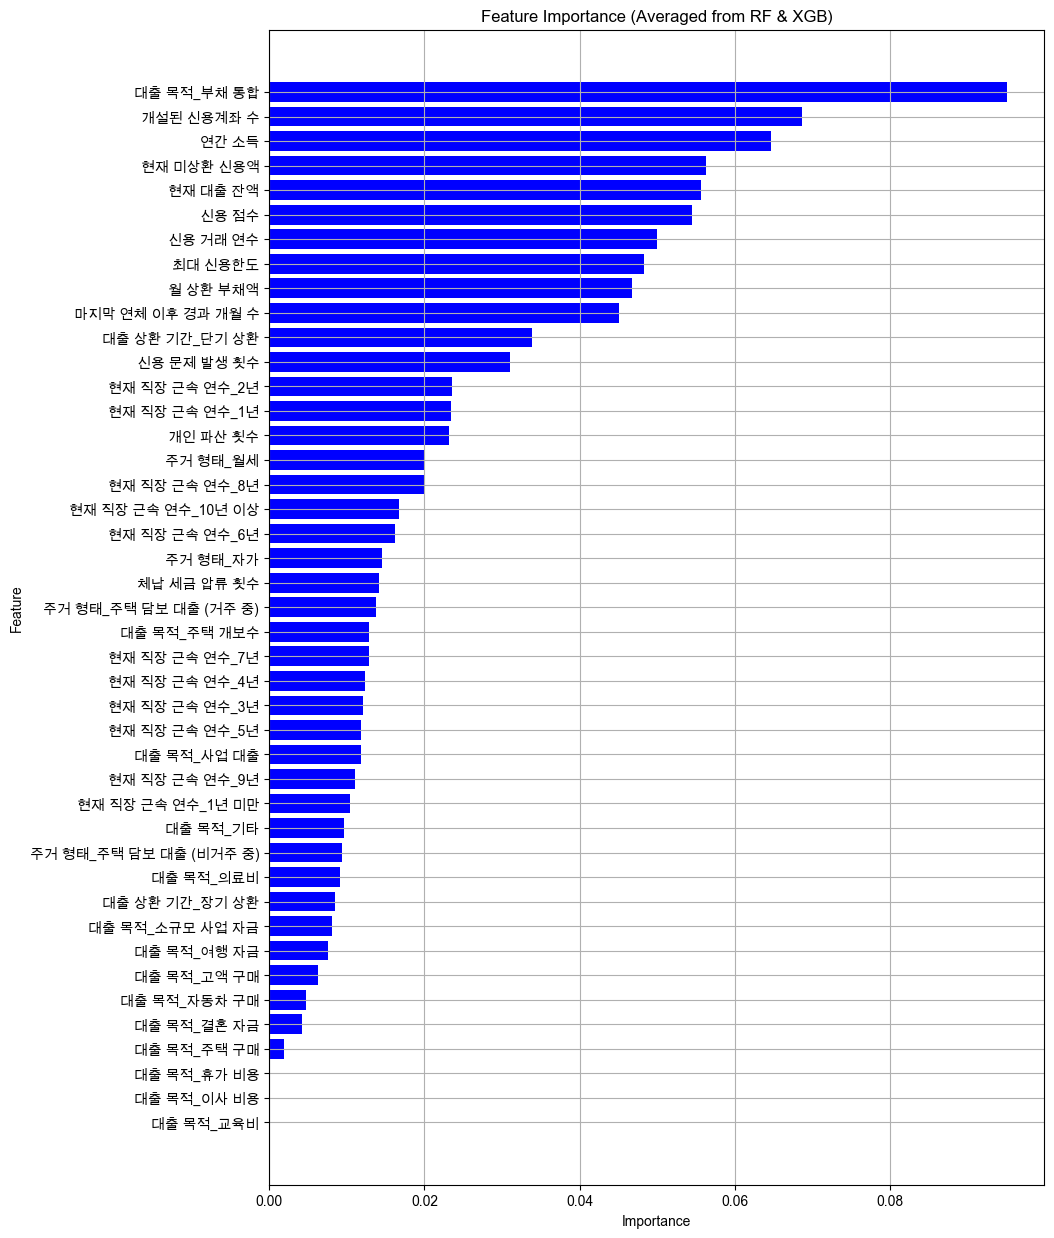

In [15]:
import pandas as pd

# 개별 모델 Feature Importance 평균 계산
rf_importances = voting_clf.named_estimators_['rf'].feature_importances_
xgb_importances = voting_clf.named_estimators_['xgb'].feature_importances_
feature_importances = (rf_importances + xgb_importances) / 2

# 데이터프레임 변환
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Averaged from RF & XGB)')
plt.gca().invert_yaxis()
plt.grid()
plt.show()
